In [2]:
import pandas as pd


In [3]:
df=pd.read_csv("students_performance.csv")

In [4]:
df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.columns

Index(['Unnamed: 0', 'Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                     0
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
#teacher_quality , parental_education_level , distance from the home contains the missing values
#performing mode imputation because those columns contains the values in categorical form
Teach_mode = str(df["Teacher_Quality"].mode())

In [8]:
#filling the missing values using fillna function
df["Teacher_Quality"].fillna(Teach_mode,inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0                     0
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
#performing on parental_education_level column
#mode imputation
parent_mode = str(df["Parental_Education_Level"].mode())

In [14]:
#filling the missing values
df["Parental_Education_Level"].fillna(parent_mode,inplace=True)

In [15]:
#now performing on distance from home
home_mode=str(df["Distance_from_Home"].mode())

In [16]:
#filling the missing values
df["Distance_from_Home"].fillna(home_mode,inplace=True)

In [17]:
df.isnull().sum()

Unnamed: 0                    0
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [18]:
df.describe()

,Unnamed: 0,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,3303.000000,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,1907.420946,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,0.000000,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,1651.500000,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,3303.000000,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,4954.500000,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,6606.000000,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [19]:
a1=int(df.describe()["Hours_Studied"]["25%"])

In [21]:
a3=int(df.describe()["Hours_Studied"]["75%"])

In [22]:
IQR=a3-a1
print(IQR)

8


In [23]:
lower_limit=a1-1.5*IQR
upper_limit=a3+1.5*IQR

In [24]:
lower_limit

4.0

In [25]:
upper_limit

36.0

In [26]:
df[(df["Hours_Studied"]>upper_limit) | df["Hours_Studied"]<lower_limit].count()

Unnamed: 0                    6607
Hours_Studied                 6607
Attendance                    6607
Parental_Involvement          6607
Access_to_Resources           6607
Extracurricular_Activities    6607
Sleep_Hours                   6607
Previous_Scores               6607
Motivation_Level              6607
Internet_Access               6607
Tutoring_Sessions             6607
Family_Income                 6607
Teacher_Quality               6607
School_Type                   6607
Peer_Influence                6607
Physical_Activity             6607
Learning_Disabilities         6607
Parental_Education_Level      6607
Distance_from_Home            6607
Gender                        6607
Exam_Score                    6607
dtype: int64

In [28]:
#to handle the missing values we have two types of methonds
#CAPPING TECHNIQUE
#TRIMMING TECHNIQUE
#this is capping technique
df["Hours_Studied"].clip(lower_limit,upper_limit,inplace=True)

C:\Users\Nafreen.shaik\AppData\Local\Temp\ipykernel_9720\3024579831.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hours_Studied"].clip(lower_limit,upper_limit,inplace=True)


In [29]:
import seaborn as sns

<Axes: ylabel='Hours_Studied'>

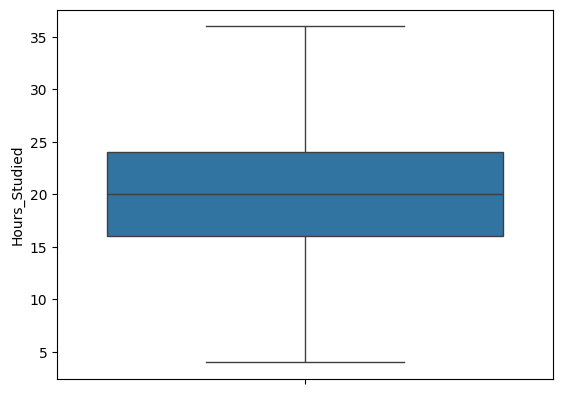

In [30]:
sns.boxplot(df["Hours_Studied"])

In [31]:
df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [32]:
df.isnull().sum()

Unnamed: 0                    0
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [33]:
df.head(2)

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [36]:
#removing the outliers by using TRIMMING
df[(df["Hours_Studied"]<upper_limit) & (df["Hours_Studied"]>lower_limit)].count()

Unnamed: 0                    6536
Hours_Studied                 6536
Attendance                    6536
Parental_Involvement          6536
Access_to_Resources           6536
Extracurricular_Activities    6536
Sleep_Hours                   6536
Previous_Scores               6536
Motivation_Level              6536
Internet_Access               6536
Tutoring_Sessions             6536
Family_Income                 6536
Teacher_Quality               6536
School_Type                   6536
Peer_Influence                6536
Physical_Activity             6536
Learning_Disabilities         6536
Parental_Education_Level      6536
Distance_from_Home            6536
Gender                        6536
Exam_Score                    6536
dtype: int64

In [37]:
new_df=df[(df["Hours_Studied"]<upper_limit) & (df["Hours_Studied"]>lower_limit)]

In [38]:
new_df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<Axes: ylabel='Hours_Studied'>

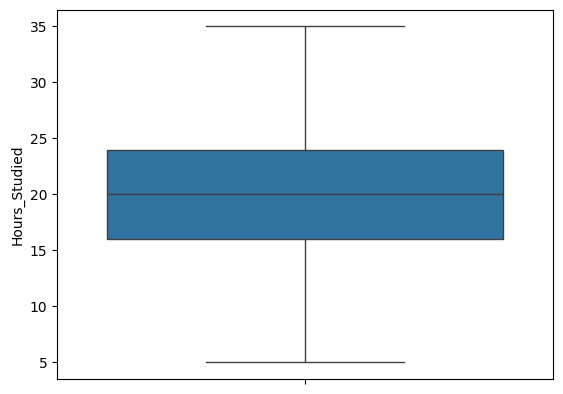

In [39]:
sns.boxplot(new_df["Hours_Studied"])

In [40]:
df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<Axes: ylabel='Hours_Studied'>

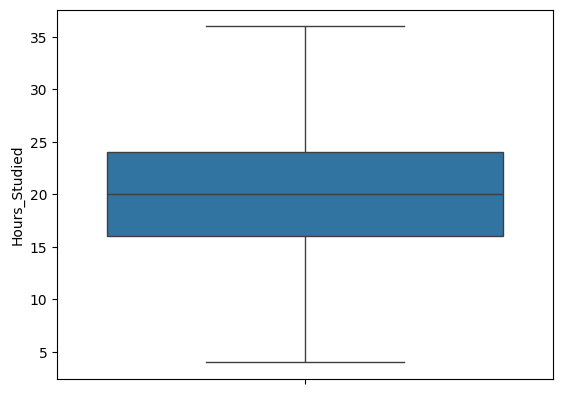

In [41]:
sns.boxplot(df["Hours_Studied"])

In [42]:
#the process of converting the categorical data into numerical data is called as encoding
#there are two types of encoding techniques they are
#ONEHOT ENCODING
#ORDINAL ENCODING
#one hot encoding for the nominal variables(gender,--which do not have any natural order)
#ordinal encoding for the ordinal variables(grades--which will have the specific and natural order itself)
df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [43]:
#gender-nominal
#parental educational level-nominal
#attendence-ordinal
#school type-nominal
#peer_influence-ordinal

In [46]:
#applying onehot encoding using pd.get_dummies function on nominal variable
df=pd.get_dummies(df,columns=["Gender","Parental_Education_Level"],dtype="int64",drop_first=True)

In [47]:
df.head(2)

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Exam_Score,Gender_Male,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Public,Positive,3,No,Near,67,1,0,1,0
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Public,Negative,4,No,Moderate,61,0,1,0,0


In [50]:
#applying ordinal encoding using map function from pandas
#attendence
#peer_influence
df["Peer_Influence"].value_counts()

Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

In [51]:
E1 = {"Positive":1,"Negative":2,"Neutral":0}
df["Peer_Influence"] = df["Peer_Influence"].str.strip()
df["Peer_Influence"] = df["Peer_Influence"].map(E1)

In [52]:
df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Exam_Score,Gender_Male,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Public,1,3,No,Near,67,1,0,1,0
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Public,2,4,No,Moderate,61,0,1,0,0
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Public,0,4,No,Near,74,1,0,0,1
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Public,2,4,No,Moderate,71,1,0,1,0
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Public,0,4,No,Near,70,0,1,0,0


In [53]:
#applying feature scaling using normalization and standardization
df_norm = df.copy()
df_stand = df.copy()

In [54]:
df_norm.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Exam_Score,Gender_Male,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,0,23,84,Low,High,No,7,73,Low,Yes,...,Public,1,3,No,Near,67,1,0,1,0
1,1,19,64,Low,Medium,No,8,59,Low,Yes,...,Public,2,4,No,Moderate,61,0,1,0,0
2,2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Public,0,4,No,Near,74,1,0,0,1
3,3,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Public,2,4,No,Moderate,71,1,0,1,0
4,4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Public,0,4,No,Near,70,0,1,0,0


In [56]:
pip install scikit_learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 541.6 kB/s eta 0:00:20
   - -------------------------------------- 0.5/11.0 MB 541.6 kB/s eta 0:00:20
   - -------------------------------------- 0.5/11.0 MB 541.6 kB/s eta 0:00:20
   - -------------------------------------- 0.5/11.0 MB 541.6 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/11.0 MB 390.4 kB/s eta 0:00:27
   --- ------------------------------------ 1.0/11.0 MB 503.5 kB/s eta 0:00:20
   ----- ---------------------------------- 1.6/11.0 MB 693.5 kB/s eta 0:00:14
   -------- ------------------------------- 2.4/11.0 MB 1.0 MB/s eta 0:00:09
   ----------- ---------------------------- 3.1/11.0 MB 1.3 MB/s eta 0:00:07
   ------------ --------------------------- 3.4/11.0 MB 1.3 MB/s eta 0:00:06
   ---

In [57]:
#normalization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [64]:
scaled=mm.fit_transform(df_norm)

ValueError: could not convert string to float: 'Low'

In [59]:
df.columns

Index(['Unnamed: 0', 'Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Distance_from_Home', 'Exam_Score', 'Gender_Male',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate'],
      dtype='object')

In [ ]:
new_df_normalized=pd.DataFrame(scaled,columns=df_norm.columns)